Lastest version arraymap with mecan
Use data from oringal file instead of db

In [1]:
from pymongo import MongoClient
import sys, os
sys.path.append('/Users/bogao/Desktop/projects/Relative copy number/Python/mecan')
import mecan4cna.algorithms as alg
import operator
from natsort import natsorted 

In [2]:
# db = MongoClient()['Rebased']['arraymap']

def file2list(fin):
    ls = []

    next(fin)
    for line in fin:
        line = line.split()
        try:
            ls.append({'chro':str(line[1]), 'start':int(line[2]), 'end':int(line[3]), 'probes':int(float(line[5])),'value':float(line[4])})
        except Exception as e:
            print('Skip line: {}\t{}'.format(line[0], e))
            continue
    return ls

In [4]:
arraymap_data = []
db_am_bs = MongoClient()['arraymap_ga4gh']['biosamples']
db_am_ind = MongoClient()['arraymap_ga4gh']['individuals']
db_am_cs = MongoClient()['arraymap_ga4gh']['callsets']
db_am_var = MongoClient()['arraymap_ga4gh']['variants']

# i = 0

for sample in db_am_bs.find():
    bs_id = sample['id']
    ind_id = sample['individual_id']
    project = sample['project_id']
    morphology = sample['biocharacteristics'][1]['type']['id']

    if morphology in ['icdom-00000', 'icdom-']:
        continue

    topography = sample['biocharacteristics'][0]['type']['id']
    try:
        stage = sample['info']['tnm']
    except:
        stage = None

    ind = db_am_ind.find_one({'id': ind_id})
    gender = ind['biocharacteristics'][0]['description']

    age = sample['age_at_collection']['age']
    vital_status = sample['info']['death']

    cs = db_am_cs.find_one({'biosample_id': bs_id})
    
    try:
        file_path = cs['info']['paths']['segmentfile']
    except:
        continue
        
    platform = cs['description']

    segments = []
    
#     uid = bs_id.split('_')[-1]
#     sid = project
#     fpath = os.path.join('/Volumes/arraymapMirror/arraymap/grch38', sid, uid, 'segments,cn.tsv')
    
#     try:
#         with open(fpath, 'r') as fin:
#             segments = file2list(fin)
#     except Exception as e:
#         print('{}\t{}'.format(bs_id, e))
#         continue
    
    
    
    
#     for var in db_am_var.find({'biosample_id': bs_id}):
#         segments.append({'chro': var['reference_name'],
#                          'start': var['start'][0],
#                          'end': var['end'][0],
#                          'probes': var['info']['cnv_length'],
#                          'value': var['info']['cnv_value']})
# #     segments = sorted(segments, key=operator.itemgetter('chro','start'))
#     segments = natsorted(segments, key=operator.itemgetter('chro','start'))

    arraymap_data.append({'source': 'arraymap',
                          'project': project,
                          'sample_id': bs_id,
                          'morphology': morphology,
                          'topography': topography,
                          'stage': stage,
                          'gender': gender,
                          'age': age,
                          'vital_status': vital_status,
                          'file_path': file_path,
                          'platform': platform})

#     if i >10:
#         break
#     else:
#         i +=1

In [5]:
data = arraymap_data

In [6]:
for sample in data:
    uid = sample['sample_id'].split('_')[-1]
    sid = sample['project']
    fpath = os.path.join('/Volumes/arraymapMirror/arraymap/grch38', sid, uid, 'segments,cn.tsv')
    
    try:
        with open(fpath, 'r') as fin:
            sample['segments'] = file2list(fin)
    except Exception as e:
        sample['segments'] = None
        print('Skip sample: {}\t{}'.format(bs_id, e))
        continue

Skip line: GSM374530	invalid literal for int() with base 10: 'NA'
Skip line: GSM374532	invalid literal for int() with base 10: 'NA'
Skip line: GSM374533	invalid literal for int() with base 10: 'NA'
Skip line: GSM374534	invalid literal for int() with base 10: 'NA'
Skip line: GSM374535	invalid literal for int() with base 10: 'NA'
Skip line: GSM374536	invalid literal for int() with base 10: 'NA'
Skip line: GSM374537	invalid literal for int() with base 10: 'NA'
Skip line: GSM374538	invalid literal for int() with base 10: 'NA'
Skip line: GSM374540	invalid literal for int() with base 10: 'NA'
Skip line: GSM374541	invalid literal for int() with base 10: 'NA'
Skip line: GSM374542	invalid literal for int() with base 10: 'NA'
Skip line: GSM374544	invalid literal for int() with base 10: 'NA'
Skip line: GSM374553	invalid literal for int() with base 10: 'NA'
Skip line: GSM374554	invalid literal for int() with base 10: 'NA'
Skip line: GSM374555	invalid literal for int() with base 10: 'NA'
Skip line:

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE10611/GSM267431/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE10611/GSM267442/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE13557/GSM322209/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE13557/GSM322210/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE13557/GSM322211/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE13557/GSM322212/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE1355

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50175/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50176/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50177/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50178/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50179/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50180/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE2520/GSM50181/se

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-02/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-04/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-05/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-06/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-07/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID17161458/MCL-fle-08/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymap

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR137/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR146/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR148/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR150/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR154/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID15001537/ColoRec-nak-CR159/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No 

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-22/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-23/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-24/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-25/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-27/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/PMID19097070/HCC6p-cho-28/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volu

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218575/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218576/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218577/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218578/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218579/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM218580/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/GSE8798/GSM21

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-DK-A1AF-01A-11D-A13V-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-BT-A20N-01A-11D-A14V-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-BT-A20W-01A-21D-A14V-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-DK-A1AD-01A-11D-A13V-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-DK-A1AC-01A-11D-A13V-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_BLCA/TCGA-BL-A13I-01A-11D-A13V-01/segments,cn.tsv

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-02-0321-01A-01D-0275-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-28-2513-01A-01D-0784-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-76-6192-01A-11D-1694-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-19-1790-01B-01D-1224-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-06-0124-01A-01G-0289-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_GBM/TCGA-02-0071-01A-01D-0193-01/segments,cn.tsv'
Skip

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-B0-5119-01A-02D-1417-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-EU-5905-01A-11D-1668-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-BP-5184-01A-01D-1423-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-B0-4718-01A-01D-1274-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-B0-5692-01A-11D-1530-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_KIRC/TCGA-BP-4969-01A-01D-1331-01/segments,cn.tsv

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-31-1951-01A-01D-0648-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-13-0900-01B-01D-0452-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-61-1918-01A-01D-0648-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-61-2002-01A-01D-0663-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-24-1417-01A-01D-0472-01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/TCGA_OV/TCGA-25-2399-01A-01D-0704-01/segments,cn.tsv'
Skip sampl

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/CRC19/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/CRC20/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/CRC21/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/CRC22/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/CRC23/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/LC01/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/_UKE_HW/LC02/segments,cn.tsv'
Skip sam

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2446/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2447/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2448/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2449/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2450/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/20570930-jon-ICR/RMH2452/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/ar

Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812926/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812928/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812930/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812932/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812934/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse32711/GSM812938/segments,cn.tsv'
Skip sample: spl::CutSp_A2551_10	[Errno 2] No such file or directory: '/Volumes/arraymapMirror/arraymap/grch38/gse3271

In [7]:
c = 0
m = alg.mecan()
for sample in data:
#     if 'base' not in sample.keys():
    c += 1
    try:
        if 'snp 6' in sample['platform']:
            m.peak_thresh=5000
        elif '250k' in sample['platform']:
            m.peak_thresh=2000
        else: 
            m.peak_thresh=1000

        res = m.run(sample['segments'])
        if len(res) > 1:
            base = res[0]
            level_dist = res[1]
        else:
            base = None
            level_dist = None
    except Exception as e:
        print('Skip sample: {}\t{}'.format(bs_id, e))
        base = None
        level_dist = None

    sample['base'] = base
    sample['level_distance'] = level_dist

    print(c, end='\r')


'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of typ

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of typ

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

(34, 'Result too large')
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::Cut

Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of typ

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of typ

Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of typ

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample:

(34, 'Result too large')
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::CutSp_A2551_10	object of type 'NoneType' has no len()
'NoneType' object is not iterable
Skip sample: spl::Cut

Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable

Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable

Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable

Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable
Skip sample: spl::CutSp_A2551_10	argument of type 'NoneType' is not iterable

In [25]:
print(len(data))
c = 0
for sample in data:
    if sample['base'] == None:
        c += 1
print(c)

52072
16002


In [8]:
data_write = []
for sample in data:
    if sample['base'] != None:
        data_write.append(sample)


In [9]:
len(data_write)

31805

In [11]:
db = MongoClient()['Rebased']['arraymap']
db.drop()
db.insert_many(data_write)

In [10]:
len(data)

52072

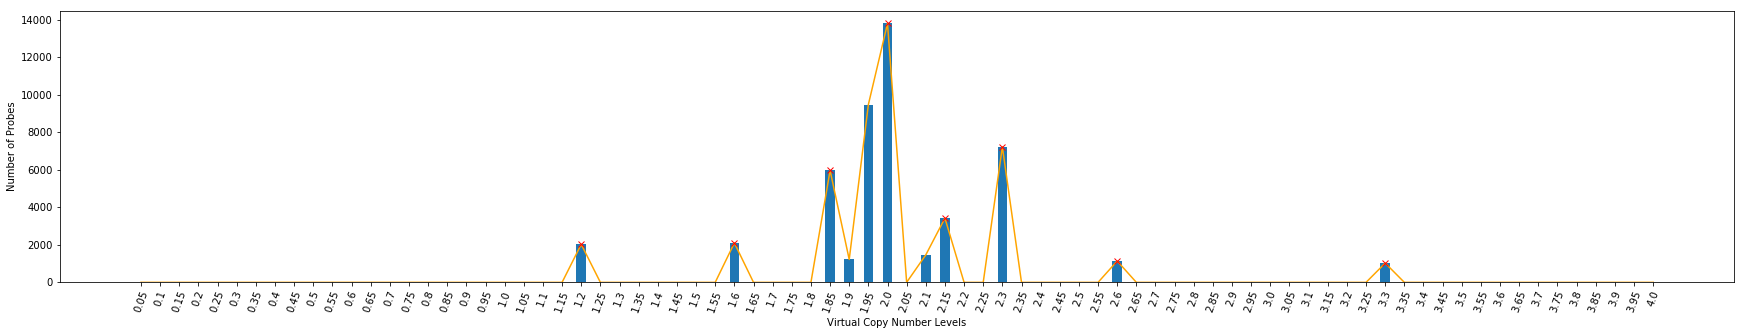

(2.0,
 1.3,
        score  neglects  base_bin  thresh_bin  base_value  thresh_value  \
 0   0.343043    5267.0      3.30        2.00        1026         13798   
 1   0.343043    5267.0      2.00        3.30       13798          1026   
 2   0.442397    5965.0      2.00        1.60       13798          2101   
 3   0.442397    5965.0      1.60        2.00        2101         13798   
 4   0.463472    3422.0      2.30        2.60        7224          1137   
 5   0.463472    3422.0      2.60        2.30        1137          7224   
 6   0.447966    2101.0      1.20        2.00        2029         13798   
 7   0.447966    2101.0      2.00        1.20       13798          2029   
 8   0.440687    3238.0      2.15        3.30        3422          1026   
 9   0.440687    3238.0      3.30        2.15        1026          3422   
 10  0.446720       0.0      1.20        1.60        2029          2101   
 11  0.446720       0.0      1.60        1.20        2101          2029   
 12  0.500405

In [23]:
m.showplot = True
m.run(data[100]['segments'])

In [19]:
td = data_write[10]
fpath = os.path.join('/Volumes/arraymapMirror/arraymap/grch38', td['project'], td['sample_id'].split('_')[-1], 'segments,cn.tsv')
with open(fpath, 'r') as fin:
            td['segments'] = file2list(fin)

In [31]:
c = 0
delete_list = []
for sample in data:
    if sample['segments'] == None:
        delete_list.append(sample['sample_id'])
        c += 1
print(c)

7068


In [32]:
c = 0
for sample in db.find({'sample_id':{'$in': delete_list}}):
    c +=1
print(c)

4265


In [35]:
db.count()

36070

In [36]:
db.delete_many({'sample_id':{'$in': delete_list}})

In [37]:
db.count()

31805